# MAKE SURE YOU RUN ON **GPU**!!!: *Select* **Runtime** -> **Change Runtime Type** -> *Select* **GPU** as your hardware acclerator!

# Intro to RL Challenge 🪄

In this challenge, you will be introduce to the 2 popular RL packages!!! They are (drum roll, please) [**Stable Baseline3**](https://stable-baselines3.readthedocs.io/en/master/)  and [**Gymnasium**](https://gymnasium.farama.org/) !

## Download the necessary packages (Will take some time, wait for it)

In [ ]:
# Load the necessary libararies
!apt install swig cmake
!pip install stable-baselines3==2.0.0a5 gymnasium[box2d]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 13 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 1s (910 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
Unpacking swig4.0 (4.0.1-5build1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.1-5build1_all

![CartPole](https://gymnasium.farama.org/_images/cart_pole.gif)

We will train an agent to control this cart pole and make it **balance**!!!

Go to [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/) for a detail reference of the environment (action space, observation space ...)

## Let's begin!!!
---
In doing this challenge, the **documentation** for the packages and **Google search** will be really helpful!

### Define the environment

In [ ]:
import gymnasium as gym

env = #TODO

#### **Solution**

In [ ]:
import gymnasium as gym

# Create the CartPole environment
env = gym.make("CartPole-v1")

### Take a look at the **action space**, **observation space** and **reward range**. What does these terms mean in this game?



In [ ]:
action_space, observation_space, reward_range = #TODO
action_space, observation_space, reward_range

#### **Solution**

In [ ]:
action_space, observation_space, reward_range = env.action_space, env.observation_space, env.reward_range
action_space, observation_space, reward_range



(Discrete(2),
 Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32),
 (-inf, inf))

- **Action Space**: Discrete(2) -> only 2 actions to take (left, right)

- **Observation Space**: min([cart position, cart velocity, pole angle, pole angular velocity])
max([cart position, cart velocity, pole angle, pole angular velocity])

- **Rewards**: can adds up to this range -> (-infinity, infinity)

- Reference: https://gymnasium.farama.org/environments/classic_control/cart_pole/

### So how do we **reset** the environment to the *initial state* and take a *random* action?

In [ ]:
observation, info = #TODO
action = #TODO
observation, reward, terminated, truncated, info = #TODO

#### **Solution**

In [ ]:
observation, info = env.reset()
action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(action)
observation, reward, terminated, truncated, info

(array([ 1.5365357e-02,  1.5953498e-01, -1.2437558e-04, -2.5744608e-01],
       dtype=float32),
 1.0,
 False,
 False,
 {})

### Let's put what you learn above together and take **random** action in the environment until the game is over!

In [ ]:
# Create the CartPole environment
env = #TODO

# Reset the environment
observation, info = #TODO

# Take a random action
action = #TODO
print("Action taken:", action)

observation, reward, terminated, truncated, info = #TODO

while(not terminated or not truncated):
  action = #TODO
  print("Action taken:", action)
  observation, reward, terminated, truncated, info = #TODO

env.close()

#### **Solution**

In [ ]:
# Create the CartPole environment
env = gym.make("CartPole-v1")

# Reset the environemnt
observation, info = env.reset()

# Take a random action
action = env.action_space.sample()
print("Action taken:", action)

observation, reward, terminated, truncated, info = env.step(action)

while(not terminated or not truncated):
  action = env.action_space.sample()
  print("Action taken:", action)
  observation, reward, terminated, truncated, info = env.step(action)

env.close()

Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 1
Action t

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


### It is time to create our RL agent!

---

We will use the PPO algorithm to train our agent. If you don't know what is PPO, that is fine, this challenge is aim to let you familiarize with how these RL tool works!!!

In [ ]:
from stable_baselines3 import PPO
# Create the CartPole environment
env = #TODO

# Instantiate the agent
model = #TODO

# Train the agent for 5 timesteps
  #TODO

# Save the trained agent
  #TODO

# delete the model from memory
  #TODO

Hint: Check [this](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

#### **Solution**

In [ ]:
from stable_baselines3 import PPO
# Create the CartPole environment
env = env = gym.make("CartPole-v1")

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)

# Train the agent for 5 timesteps
model.learn(total_timesteps=5)

# Save the trained agent
model.save("ppo_cartpole")

# delete the model from memory
del model

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | 21.3     |
| time/              |          |
|    fps             | 385      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------


### It is time to look at our agent in action (pun intended) !!
---
Thanks to [this](https://gist.github.com/soroushmehr/74b3777ef330397ec57e5076558183d6)!

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = #TODO load the model

# Create the CartPole environment
env = gym.make("CartPole-v1")

obs = #TODO # reset the environment

img = plt.imshow(env.render(mode='rgb_array')) # only call this once

while True:

  img.set_data(env.render(mode='rgb_array')) # just update the data
  display.display(plt.gcf())
  display.clear_output(wait=True)

  action, _states = #TODO predict the action and state using the model
  obs, rewards, terminated, info = #TODO take the predicted action

  if terminated:
    break

env.close()

#### **Solution**

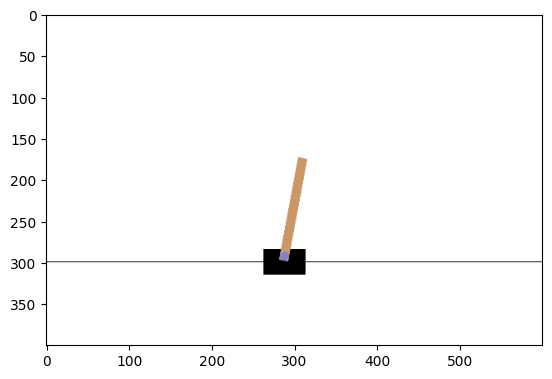

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# load the model
model = PPO.load("ppo_cartpole")

# Create the CartPole environment
env = gym.make("CartPole-v1")

# reset the environment
obs = env.reset()

img = plt.imshow(env.render(mode='rgb_array')) # only call this once

while True:

  img.set_data(env.render(mode='rgb_array')) # just update the data
  display.display(plt.gcf())
  display.clear_output(wait=True)

  action, _states = model.predict(obs)  # predict the action and state using the model
  obs, rewards, terminated, info = env.step(action) # take the predicted action

  if terminated :
    break

env.close()

### Now you know how to **train an agent** and visualize its performance!

___

For extra practice, find a [environment](https://gymnasium.farama.org/environments/classic_control/) that interests you and train an agent that use one of these [algorithms](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Keep in mind that not *all* of the *algorithm* work for *all* the *environment*!

In [ ]:
### YOU TRY!!!